<a href="https://colab.research.google.com/github/salimdason/Antimicrobial-Peptide-AMP-Predictor/blob/main/Antimicrobial_Peptide_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




*   **Notebook by Mohammed Salim Dason**
*   **Datasets source:** [Datasets](https://cbbio.online/AxPEP/?action=dataset)



In [1]:
#Installation of conda and rdkit for computing molecular descriptors
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-03-20 20:01:25--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   111MB/s    in 0.7s    

2021-03-20 20:01:26 (111 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
#Installation of Pfeature to compute amino acid propertites to quantify molecular properties of peptide
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

In [ ]:
! unzip Pfeature.zip

In [12]:
% cd Pfeature

/content/Pfeature


In [13]:
! python setup.py install

/usr/local/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
copying Pfeature/pfeature.py -> build/lib/Pfeature
copying Pfeature/__init__.py -> build/lib/Pfeature
running install_lib
creating /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/bin_di.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/data -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/AAIndexNames.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/pfeature.py -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/aaindices.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/Grantham.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/bonds.csv -> /usr/local/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeatu

In [14]:
#Installing CD-HIT to filter redundancy in peptide sequences thus removing similar peptides, and getting a unique dataset for model building
!conda install -c bioconda cd-hit -y

Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.1.19  |       h06a4308_1         118 KB
    cd-hit-4.8.1               |       hdbcaa40_0         221 KB  bioconda
    certifi-2020.12.5          |   py37h06a4308_0         141 KB
    conda-4.9.2                |   py37h06a4308_0         2.9 MB
    openssl-1.1.1j             |       h27cfd23_0         2.5 MB
    ------------------------------------------------------------
                                           Total:         5.9 MB

The following NEW packages will be INSTALLED:

  cd-hit             bioconda/linux-64::cd-hit-4.8.1-hdbcaa40_0

The following packages will be UPDATED:

  ca-certificates                                2020.1.1-0 --> 2021.1.19-h06a4308_1
  certifi        

In [ ]:
#Removing redundant sequences with CD-HIT
!cd-hit -i /content/Datasets/train_po.fasta -o /content/Datasets/train_po_cdhit.txt -c 0.99


In [34]:
! cd-hit -i /content/Datasets/train_ne.fasta -o /content/Datasets/train_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i /content/Datasets/train_ne.fasta -o
         /content/Datasets/train_ne_cdhit.txt -c 0.99

Started: Sat Mar 20 21:43:44 2021
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485331

comparing sequences from          0  to       1445
.
     1445  finished       1422  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.08


In [21]:
!grep ">" /content/Datasets/train_po_cdhit.txt | wc -l 

1337


In [25]:
!grep ">" /content/Datasets/train_ne.fasta | wc -l

1529


In [26]:
!grep ">" /content/Datasets/train_po.fasta | wc -l

1529


In [ ]:
!grep ">" /content/Datasets/train_ne_cdhit.txt | wc -l

**Calculating features using the Pfeature library**

In [37]:
import pandas as pd


In [38]:
#Using the Amino-acid Composition (aac_wp) function from pfeature library
from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in
aac('/content/Datasets/train_po_cdhit.txt')

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1333,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1334,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1335,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


In [41]:
#Tripeptide composition function
from Pfeature.pfeature import tpc_wp

def tpc(input):
  a = input.rstrip('txt')
  output = a + 'tpc.csv'
  df_out = tpc_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

feature = tpc('/content/Datasets/train_po_cdhit.txt')
feature

,TPC_AAA,TPC_AAC,TPC_AAD,TPC_AAE,TPC_AAF,TPC_AAG,TPC_AAH,TPC_AAI,TPC_AAK,TPC_AAL,TPC_AAM,TPC_AAN,TPC_AAP,TPC_AAQ,TPC_AAR,TPC_AAS,TPC_AAT,TPC_AAV,TPC_AAW,TPC_AAY,TPC_ACA,TPC_ACC,TPC_ACD,TPC_ACE,TPC_ACF,TPC_ACG,TPC_ACH,TPC_ACI,TPC_ACK,TPC_ACL,TPC_ACM,TPC_ACN,TPC_ACP,TPC_ACQ,TPC_ACR,TPC_ACS,TPC_ACT,TPC_ACV,TPC_ACW,TPC_ACY,...,TPC_YWA,TPC_YWC,TPC_YWD,TPC_YWE,TPC_YWF,TPC_YWG,TPC_YWH,TPC_YWI,TPC_YWK,TPC_YWL,TPC_YWM,TPC_YWN,TPC_YWP,TPC_YWQ,TPC_YWR,TPC_YWS,TPC_YWT,TPC_YWV,TPC_YWW,TPC_YWY,TPC_YYA,TPC_YYC,TPC_YYD,TPC_YYE,TPC_YYF,TPC_YYG,TPC_YYH,TPC_YYI,TPC_YYK,TPC_YYL,TPC_YYM,TPC_YYN,TPC_YYP,TPC_YYQ,TPC_YYR,TPC_YYS,TPC_YYT,TPC_YYV,TPC_YYW,TPC_YYY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating features for both positive and negative classes, combining the classes, and then merging with class labels. 

In [43]:
pos = '/content/Datasets/train_po_cdhit.txt'
neg = '/content/Datasets/train_ne_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculating feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Creating class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combining po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combining feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature = feature_calc(pos, neg, aac) # AAC
#feature = feature_calc(pos, neg, tpc) # PC
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33,negative


Pre-Processing Data

In [44]:
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33,negative


In [52]:
#Assigning feature to X and class label to Y
X = feature.drop('class', axis=1)
y = feature['class'].copy()

In [53]:
#Encoding the Y class label
y = y.map({'positibe': 1, "negative": 0})

In [54]:
X.shape

(2759, 20)

In [55]:
#Variance threshold

from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33


In [57]:
#Data splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

ValueError: ignored

In [60]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature.drop('class', axis=1)
y = feature['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
#models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_tes

100%|██████████| 29/29 [00:06<00:00,  4.17it/s]


In [61]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
RandomForestClassifier,0.93,0.93,None,0.93,0.86,0.56
LabelSpreading,0.93,0.93,None,0.93,0.86,0.64
LabelPropagation,0.93,0.93,None,0.93,0.86,0.52
DecisionTreeClassifier,0.93,0.93,None,0.93,0.86,0.07
ExtraTreeClassifier,0.93,0.93,None,0.93,0.86,0.04
ExtraTreesClassifier,0.93,0.93,None,0.93,0.86,0.41
LGBMClassifier,0.92,0.92,None,0.92,0.84,0.22
BaggingClassifier,0.92,0.92,None,0.92,0.83,0.18
NuSVC,0.86,0.86,None,0.86,0.72,0.46


In [63]:
y_test

1098    positive
972     positive
1334    negative
1163    positive
821     negative
          ...   
737     positive
1013    positive
959     positive
121     negative
698     negative
Name: class, Length: 552, dtype: object

[(0.0, 1.0)]

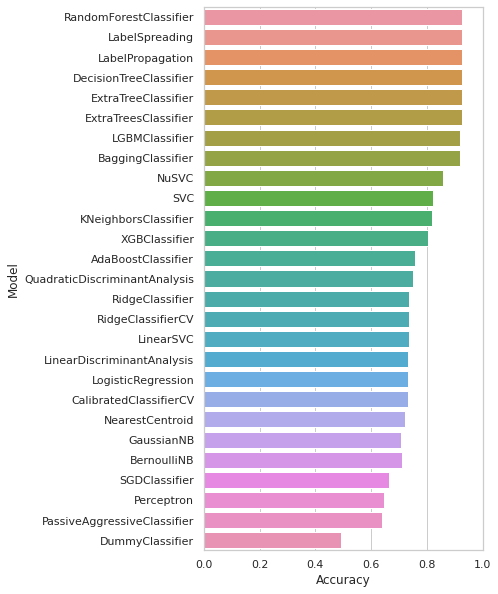

In [64]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

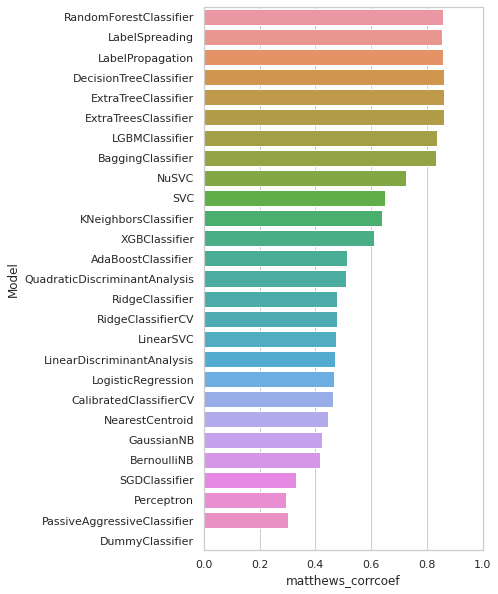

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

**Random Forest**

In [66]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Applying model to make predictions**

In [67]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

**Performance of model**

In [68]:

feature['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [71]:
# Obbtaining the model performance (Accuracy)
rf.score(X_test,y_test)

0.7047101449275363

In [72]:

# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.40920827347320343

In [73]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[201,  84],
       [ 79, 188]])

In [74]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

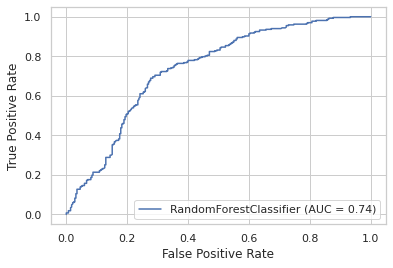

In [75]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)  
plt.show()

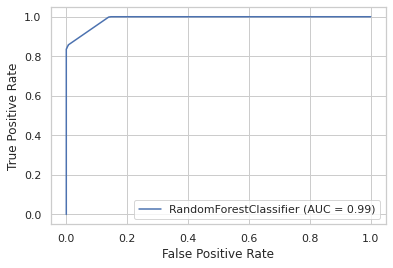

In [76]:
plot_roc_curve(rf, X_train, y_train)  
plt.show()

In [77]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33


In [78]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [79]:

# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,AAC_A,0.05
1,AAC_C,0.04
2,AAC_D,0.09
3,AAC_E,0.08
4,AAC_F,0.04
5,AAC_G,0.05
6,AAC_H,0.02
7,AAC_I,0.06
8,AAC_K,0.10
9,AAC_L,0.07


Text(0.5, 0, 'Feature Importance')

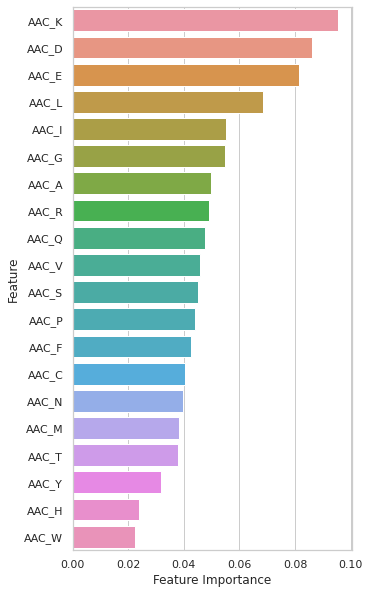

In [80]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")